In [ ]:
! git clone https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness.git

fatal: destination path 'fiap-ml-visao-computacional-detector-liveness' already exists and is not an empty directory.


# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas. 

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial. 

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/blob/master/notebook/imagens/liveness.jpg?raw=1">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes        | RM             | Turma   |
| :-------------------------- | :------------- | :-----: |
| Alberto Piheiro             | RM 343660      | 22IA |
| Integrante 2                | RM 12345       | XIA  |
| Integrante 3                | RM 12345       | XIA  |
| Integrante 4                | RM 12345       | XIA  |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**: 



Primeiramente, antecedendo a etapa de treinamento do modelo de liveness, iremos capturar os frames de dois videos: 

  * O primeiro video será a gravação do usuário;

  * O segundo video será a gravação do primeiro video exibido através de uma tela de celular, este será o video fake.



Obs. Os frames serão capturados pelo método "haarcascate", onde já os capturamos com a detecção de face.



Já na etapa de treinamento iremos utilizar redes neurais com classificação binária para distinguir as imagens reais das fakes.

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [38]:
#IDENTIFICAÇÃO DE FACES
import cv2

# Using Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Real video
cap = cv2.VideoCapture('./BaseVideos/real.mp4')

count = 0
while count<400:
    ret, img = cap.read()
    try:
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            roi_color = img[y:y+h, x:x+w]

            cv2.imwrite(str(count)+'crop_faces.jpg', roi_color)
            count=+1

    except:
        print('error: ')

# Fake video
cap = cv2.VideoCapture('./BaseVideos/fake.mp4')

count = 0
while count<400:
    ret, img = cap.read()
    try:
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            roi_color = img[y:y+h, x:x+w]

            cv2.imwrite(str(count)+'crop_faces.jpg', roi_color)
            count=+1

    except:
        print('error: ')

### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [196]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
matplotlib.use("Agg")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imutils import paths
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

%matplotlib inline

class LivenessNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
    
    # first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(16, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(16, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
  
  	# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(64))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		# return the constructed network architecture
		return model

In [111]:
# Incializando o modelo
# epochs to train for
INIT_LR = 1e-4
BS = 8
EPOCHS = 50
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images('/BaseFotos/data'))
data = []
labels = []

# loop over all image paths
for imagePath in imagePaths:
  # extract the class label from the filename, load the image and
  # resize it to be a fixed 32x32 pixels, ignoring aspect ratio
  label = imagePath.split(os.path.sep)[-2]
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (32, 32))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# update the data and labels lists, respectively
  data.append(image)
  labels.append(label)

# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0



[INFO] loading images...


In [113]:
# encode the labels (which are currently strings) as integers and then
# one-hot encode them
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, 2)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

In [115]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

# initialize the optimizer and model
print("[INFO] compiling model...")

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = LivenessNet.build(width=32, height=32, depth=3, classes=len(le.classes_))

model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))

H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // BS, epochs=EPOCHS)

[INFO] compiling model...
[INFO] training network for 50 epochs...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
80/80 [==============================] - 5s 41ms/step - loss: 0.7409 - accuracy: 0.6948 - val_loss: 0.6340 - val_accuracy: 0.7083
Epoch 2/50
80/80 [==============================] - 3s 38ms/step - loss: 0.5614 - accuracy: 0.7778 - val_loss: 0.7598 - val_accuracy: 0.7083
Epoch 3/50
80/80 [==============================] - 3s 38ms/step - loss: 0.4513 - accuracy: 0.8326 - val_loss: 0.7913 - val_accuracy: 0.7083
Epoch 4/50
80/80 [==============================] - 3s 38ms/step - loss: 0.3824 - accuracy: 0.8701 - val_loss: 0.6801 - val_accuracy: 0.7083
Epoch 5/50
80/80 [==============================] - 3s 38ms/step - loss: 0.3714 - accuracy: 0.8748 - val_loss: 0.4267 - val_accuracy: 0.8241
Epoch 6/50
80/80 [==============================] - 3s 38ms/step - loss: 0.2909 - accuracy: 0.8998 - val_loss: 0.1774 - val_accuracy: 0.8935
Epoch 7/50
80/80 [==============================] - 3s 38ms/step - loss: 0.2992 - accuracy: 0.8967 - val_loss: 0.0674 - val_accuracy: 0.9815
Epoch 8/50
80

### 4.3 Métricas de desempenho do modelo (2 pontos)

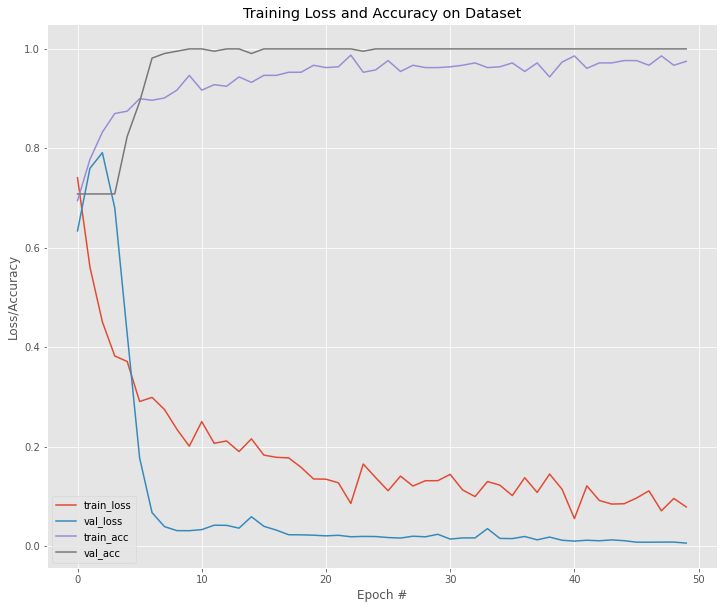

In [197]:
# evaluate the network
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12, 10))
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

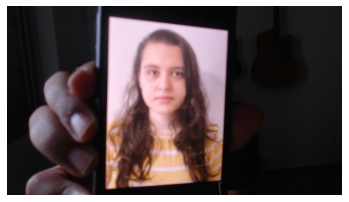

In [198]:
# Criando imagem fake
stefanye = cv2.imread('./BaseFotos/teste/fake_stefanye.jpg', -1)
plt.axis("off")
stefanye_rgb = cv2.cvtColor(stefanye, cv2.COLOR_BGR2RGB)
plt.imshow(stefanye_rgb)

(-0.5, 31.5, 31.5, -0.5)

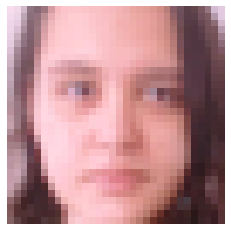

In [199]:
# Extraindo face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(stefanye_rgb, 1.3, 5)

for (x,y,w,h) in faces:
  roi_color = stefanye_rgb[y:y+h, x:x+w]

# plotando
plt.axis("off")
plt.imshow(roi_color)

# Redimensionando os dados
roi_color_redimensionado = cv2.resize(roi_color, (32, 32))

# convertendo os dados
image_np = np.array(roi_color_redimensionado, dtype="float") / 255.0

plt.imshow(image_np)
plt.axis("off")

In [200]:
# Prevendo classe
model.predict(image_np[None, ...])

array([[0.9828713 , 0.01712874]], dtype=float32)

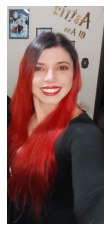

In [202]:
# Criando imagem real
sara = cv2.imread('./BaseFotos/teste/real_sara.jpeg', -1)
plt.axis("off")
sara_rgb = cv2.cvtColor(sara, cv2.COLOR_BGR2RGB)
plt.imshow(sara_rgb)

(-0.5, 31.5, 31.5, -0.5)

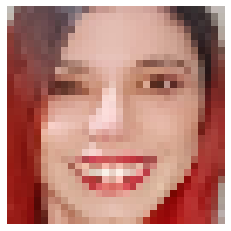

In [203]:
# Extraindo face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(sara_rgb, 1.3, 5)

for (x,y,w,h) in faces:
  roi_color = sara_rgb[y:y+h, x:x+w]

# plotando
plt.axis("off")
plt.imshow(roi_color)

# Redimensionando os dados
roi_color_redimensionado = cv2.resize(roi_color, (32, 32))

# convertendo os dados
image_np = np.array(roi_color_redimensionado, dtype="float") / 255.0

plt.imshow(image_np)
plt.axis("off")

In [204]:
# Prevendo classe
model.predict(image_np[None, ...])

array([[1.6673339e-09, 1.0000000e+00]], dtype=float32)

>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:



Realizamos antes de tudo o entendimento da proposta do trabalho final, e revisamos os exercicios que fizemos em sala de aula para reelembrar algumas funcoes e realizar pesquisas das quais nao sabiamos como executar. A conclusao, é que com base no layout do trabalho, conseguimos organizar os primeiros pontos de identificacao da face, e posteriormente levar isso a um modelo de treino Liveness o que sentimos maior dificuldade para aplicar pois haviamos alguns entendimentos que eram necessarios voltarmos a entender para aplicar...



Em uma nova versao, pretendemos trabalhar gradativamente para a melhoria do modelo para auxiliar grandemente a empresa na detecção de fraude e também em outros nichos. Também vale pensar em usar em toda a extensão física da empresa, como controle de trânsito de pessoas e de cumprimento de jornada.